In [1]:
# 📊 Data Handling
import pandas as pd
import numpy as np

# 🔍 Anomaly Detection
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



# 🚀 Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 🧪 Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ⚖️ Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 💾 Model Saving/Loading
import pickle

In [4]:
import tensorflow as tf
print(tf.__version__)  # Should print: 2.11.0


2.19.0


In [2]:
url = r"C:\Users\Ramu M\Downloads\customer_feedback_dataset.csv"
df = pd.read_csv(url)
df.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,The website is slow and unresponsive. I tried ...,Negative,1,Claim
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Extremely dissatisfied with the level of servi...,Negative,1,Support
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,One of the best experiences I've had with a se...,Positive,5,Claim
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,The service was neither great nor bad. I got m...,Neutral,4,Policy Purchase
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,I had a terrible experience with the claims de...,Negative,1,Support


In [5]:
df.shape

(5000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_ID        5000 non-null   object
 1   Customer_ID      5000 non-null   object
 2   Review_Text      5000 non-null   object
 3   Sentiment_Label  5000 non-null   object
 4   Rating           5000 non-null   int64 
 5   Service_Type     5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Review_ID', 'Customer_ID', 'Review_Text', 'Sentiment_Label', 'Rating',
       'Service_Type'],
      dtype='object')

In [9]:
df.isnull().sum()

Review_ID          0
Customer_ID        0
Review_Text        0
Sentiment_Label    0
Rating             0
Service_Type       0
dtype: int64

In [10]:
df.describe()

,Rating
count,5000.00000
mean,2.97300
std,1.36713
min,1.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,5.00000


In [11]:
df["Sentiment_Label"].value_counts()

Sentiment_Label
Negative    1727
Neutral     1643
Positive    1630
Name: count, dtype: int64

In [12]:
df.select_dtypes(include=['int64',"float64"])

,Rating
0,1
1,1
2,5
3,4
4,1
...,...
4995,4
4996,2
4997,4
4998,4


In [13]:
df.select_dtypes(exclude=['int64',"float64"])

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Service_Type
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,The website is slow and unresponsive. I tried ...,Negative,Claim
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Extremely dissatisfied with the level of servi...,Negative,Support
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,One of the best experiences I've had with a se...,Positive,Claim
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,The service was neither great nor bad. I got m...,Neutral,Policy Purchase
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,I had a terrible experience with the claims de...,Negative,Support
...,...,...,...,...,...
4995,4008f56f-b790-4df6-8488-3d6d35d9b8d9,fd9858f1-c01c-4e2c-b8c9-13eb816f4bfc,"The service met my expectations, nothing more,...",Neutral,Support
4996,b3096e1a-f36d-4a00-8e77-c4972af791b2,6d6196fb-e167-4b53-b58e-761e82ccf72f,Had an average experience with the claims proc...,Neutral,Support
4997,7d5c898b-0765-4eb3-af7d-5e3927972ad0,a44cdb6e-4edf-4eae-a71b-13c2a3782795,One of the best experiences I've had with a se...,Positive,Support
4998,ed4260fa-9510-455e-b6f3-5775f86bfc20,547f0c00-1d72-41fe-933a-7f3b1b40bcb8,Excellent service! The team was very professio...,Positive,Policy Purchase


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\2733108744.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\2733108744.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\2733108744.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\2733108744.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\2733108744.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width 

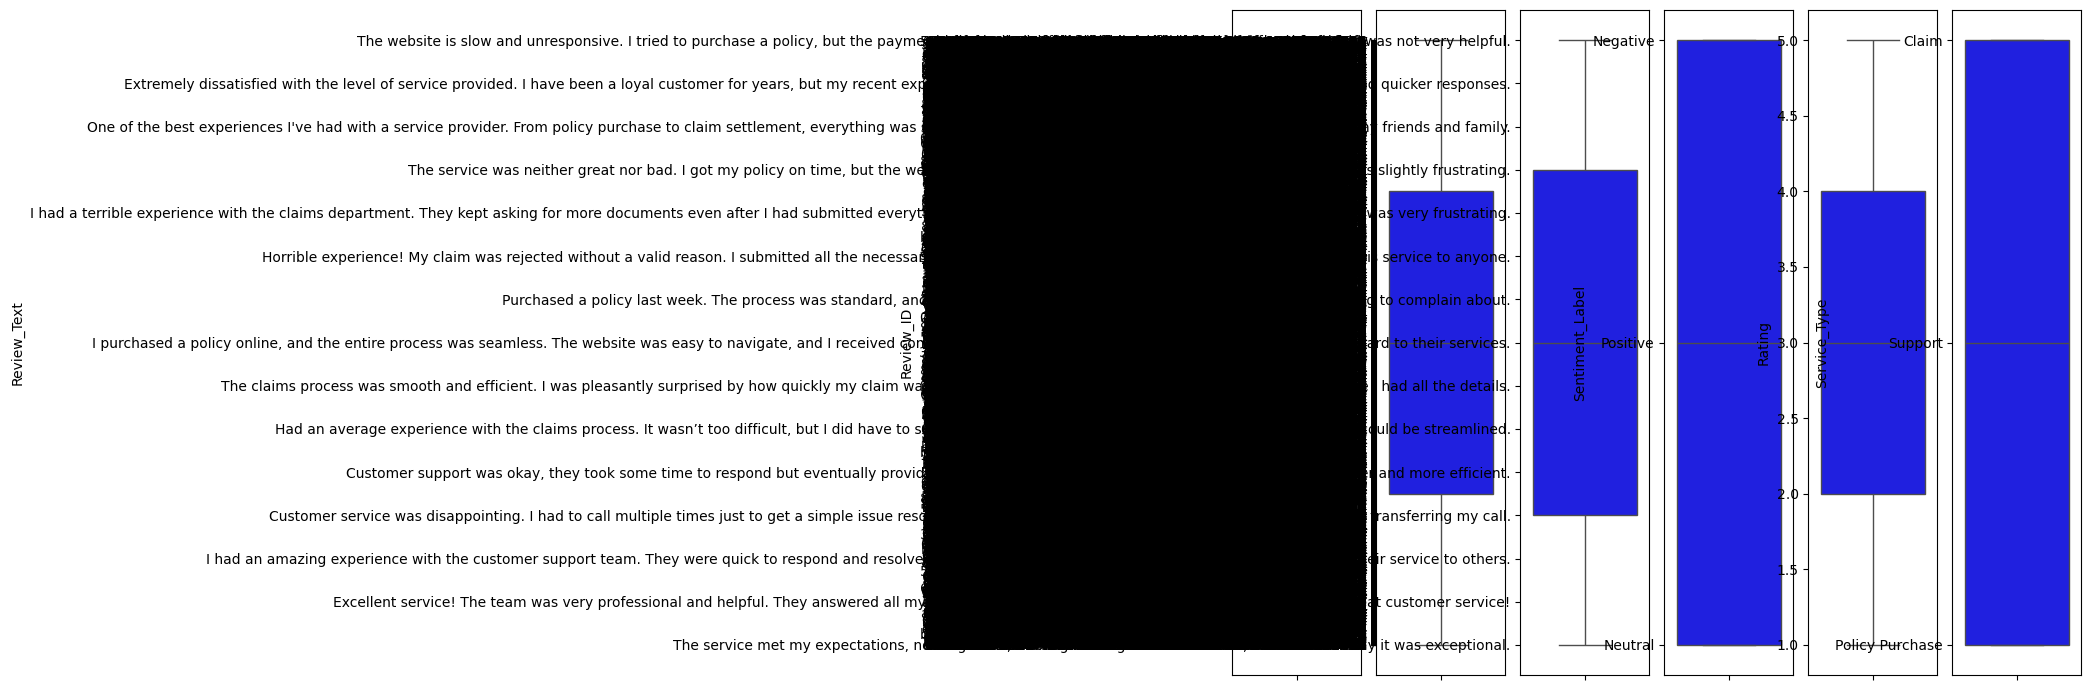

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
features = ['Review_ID', 'Customer_ID', 'Review_Text', 'Sentiment_Label', 'Rating',
       'Service_Type']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='blue',)
    plt.tight_layout()

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_9324\4286140970.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Label', palette='Set2')


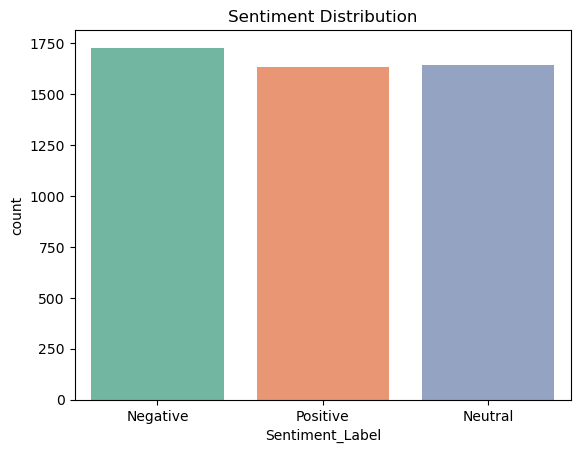

In [17]:
sns.countplot(data=df, x='Sentiment_Label', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()


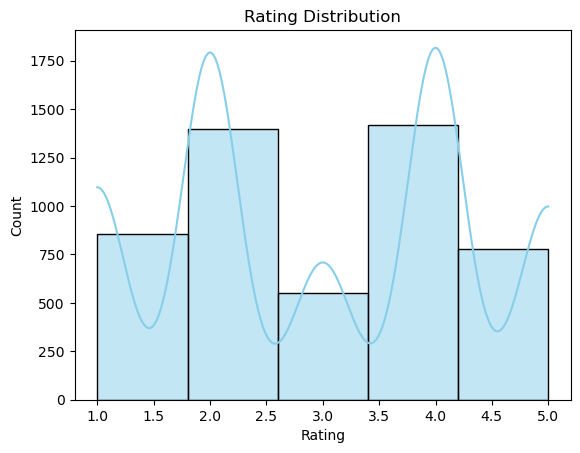

In [18]:
sns.histplot(data=df, x='Rating', bins=5, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.show()


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_9324\3944865224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Service_Type', palette='Set3')


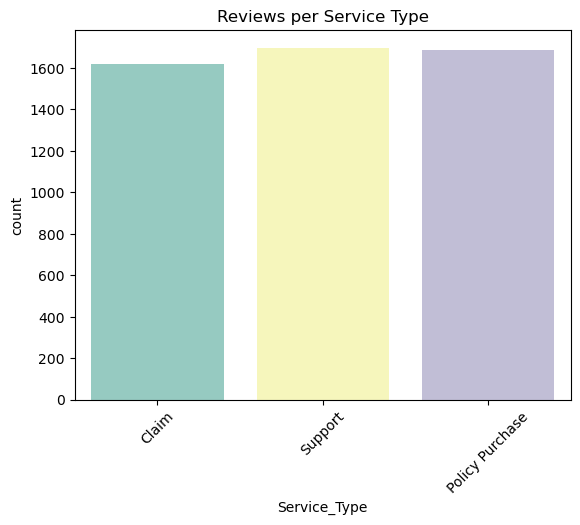

In [19]:
sns.countplot(data=df, x='Service_Type', palette='Set3')
plt.title("Reviews per Service Type")
plt.xticks(rotation=45)
plt.show()


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_9324\4284664394.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment_Label', y='Rating', palette='pastel')


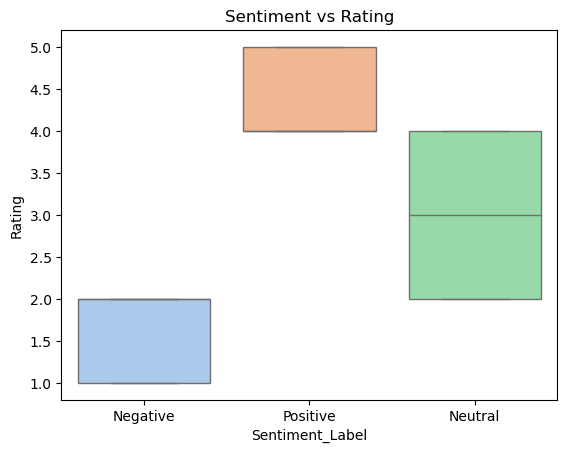

In [20]:
sns.boxplot(data=df, x='Sentiment_Label', y='Rating', palette='pastel')
plt.title("Sentiment vs Rating")
plt.show()


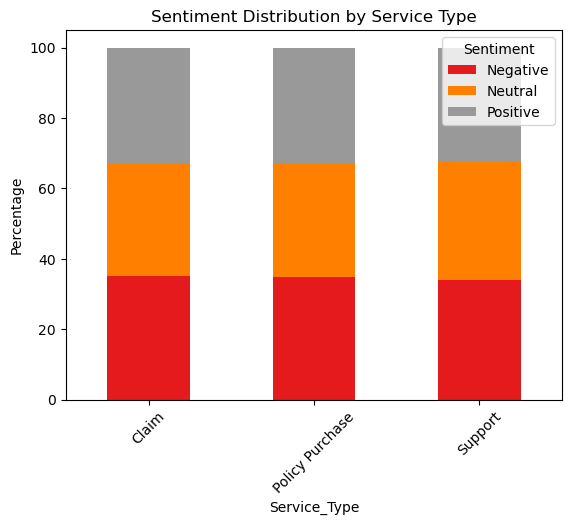

In [21]:
sentiment_service = pd.crosstab(df['Service_Type'], df['Sentiment_Label'], normalize='index') * 100
sentiment_service.plot(kind='bar', stacked=True, colormap='Set1')
plt.ylabel("Percentage")
plt.title("Sentiment Distribution by Service Type")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


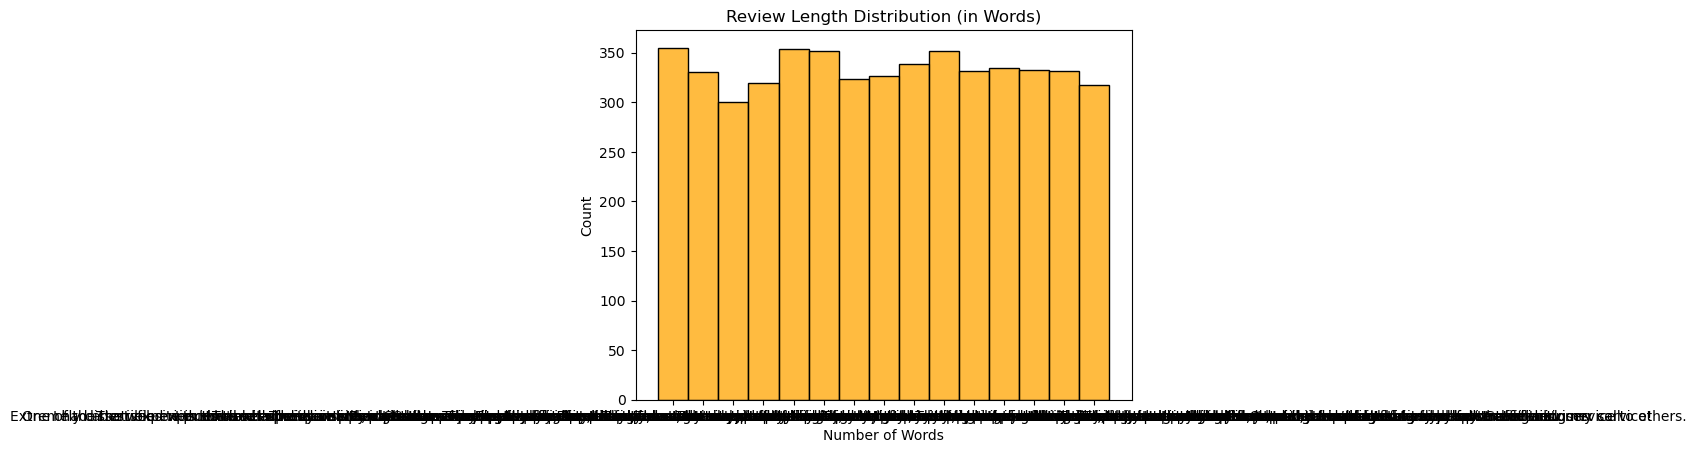

In [25]:
sns.histplot(df['Review_Text'], bins=30, color='orange')
plt.title("Review Length Distribution (in Words)")
plt.xlabel("Number of Words")
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\Ramu
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


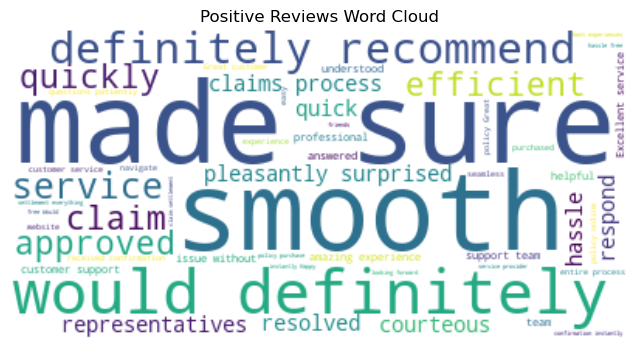

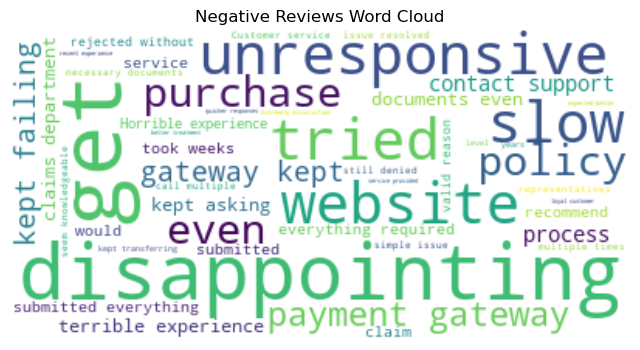

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(' '.join(text))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Usage
generate_wordcloud(df[df['Sentiment_Label'] == 'Positive']['Review_Text'], "Positive Reviews Word Cloud")
generate_wordcloud(df[df['Sentiment_Label'] == 'Negative']['Review_Text'], "Negative Reviews Word Cloud")


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Ramu
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ramu
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ramu
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()  # or use word_tokenize(text) if punkt is available
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [16]:
df['Clean_Review'] = df['Review_Text'].astype(str).apply(preprocess_text)


In [17]:
df.head(1)

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,Clean_Review
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,The website is slow and unresponsive. I tried ...,Negative,1,Claim,website slow unresponsive tried purchase polic...


In [18]:
df.drop('Review_Text', axis=1, inplace=True)

In [19]:
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment_Label'] = df['Rating'].apply(label_sentiment)


In [20]:
df.iloc[1]

Review_ID                       8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66
Customer_ID                     eee5da15-5e7d-4a21-9159-045b0799f7c3
Sentiment_Label                                             Negative
Rating                                                             1
Service_Type                                                 Support
Clean_Review       extremely dissatisfied level service provided ...
Name: 1, dtype: object

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [18]:
!pip install wordcloud

In [19]:
df.head()

,Review_ID,Customer_ID,Sentiment_Label,Rating,Service_Type,Clean_Review
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,Negative,1,Claim,website slow unresponsive tried purchase polic...
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Negative,1,Support,extremely dissatisfied level service provided ...
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,Positive,5,Claim,one best experience ive service provider polic...
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,Positive,4,Policy Purchase,service neither great bad got policy time webs...
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,Negative,1,Support,terrible experience claim department kept aski...


In [20]:
# Save to CSV
df.to_csv('customer_feedback.csv', index=False)

print("CSV file saved successfully.")


CSV file saved successfully.


In [21]:
df['Sentiment_Label'].value_counts()

Sentiment_Label
Negative    2253
Positive    2195
Neutral      552
Name: count, dtype: int64

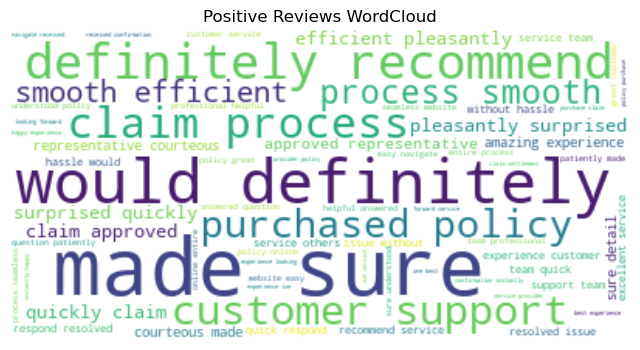

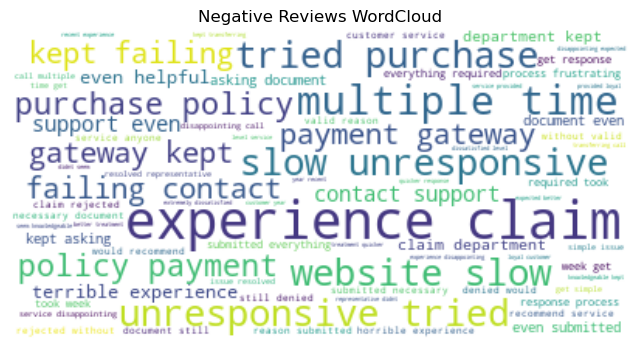

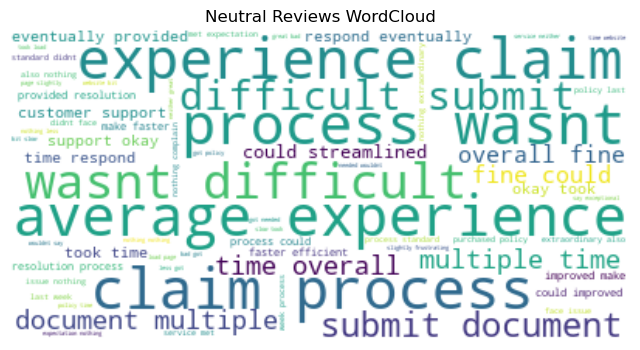

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_data, title):
    text = ' '.join(text_data)
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate for each sentiment
generate_wordcloud(df[df['Sentiment_Label'] == 'Positive']['Clean_Review'], "Positive Reviews WordCloud")
generate_wordcloud(df[df['Sentiment_Label'] == 'Negative']['Clean_Review'], "Negative Reviews WordCloud")
generate_wordcloud(df[df['Sentiment_Label'] == 'Neutral']['Clean_Review'], "Neutral Reviews WordCloud")


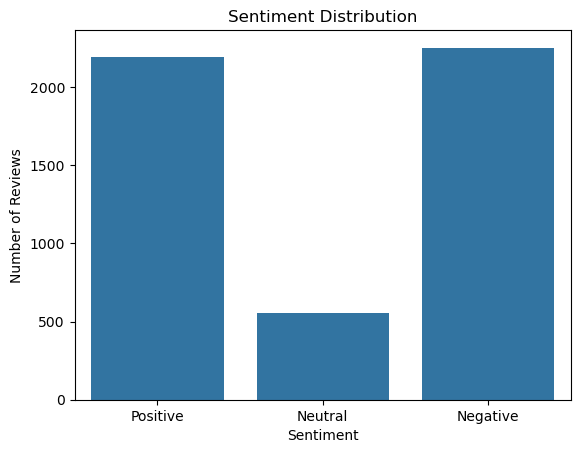

In [31]:
import seaborn as sns

sns.countplot(data=df, x='Sentiment_Label', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [32]:
from collections import Counter

def get_top_words(data, sentiment, n=15):
    words = ' '.join(data[data['Sentiment_Label'] == sentiment]['Clean_Review']).split()
    most_common = Counter(words).most_common(n)
    return pd.DataFrame(most_common, columns=['Word', 'Count'])

# View top 15 words for each sentiment
top_pos = get_top_words(df, 'Positive')
top_neg = get_top_words(df, 'Negative')
top_neu = get_top_words(df, 'Neutral')

print("Top Positive Words:\n", top_pos)
print("\nTop Negative Words:\n", top_neg)
print("\nTop Neutral Words:\n", top_neu)


Top Positive Words:
           Word  Count
0      service   1858
1       policy   1183
2        claim   1096
3   experience   1077
4      process    995
5     customer    769
6         made    671
7         sure    671
8         team    665
9       smooth    639
10       would    633
11  definitely    633
12   recommend    633
13     nothing    452
14       great    449

Top Negative Words:
              Word  Count
0         service   1227
1      experience   1137
2            kept   1044
3           claim    806
4        document    806
5        customer    775
6            even    709
7       submitted    706
8             get    689
9        response    685
10        process    671
11           call    670
12  disappointing    666
13           time    657
14         policy    576

Top Neutral Words:
           Word  Count
0      nothing    420
1      process    360
2         time    342
3        could    253
4         took    208
5       policy    196
6      service    192
7       

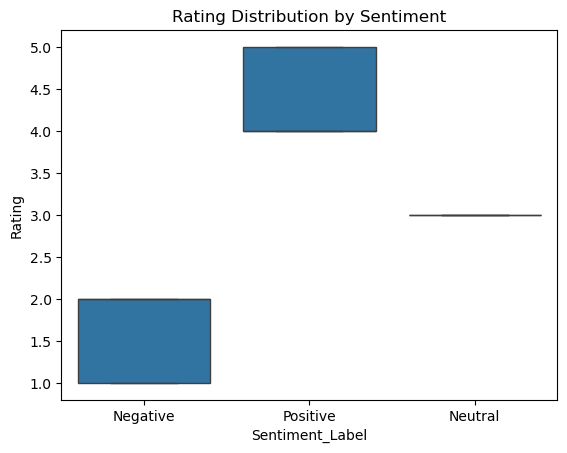

In [33]:
sns.boxplot(data=df, x='Sentiment_Label', y='Rating')
plt.title('Rating Distribution by Sentiment')
plt.show()


In [22]:
df.columns

Index(['Review_ID', 'Customer_ID', 'Sentiment_Label', 'Rating', 'Service_Type',
       'Clean_Review'],
      dtype='object')

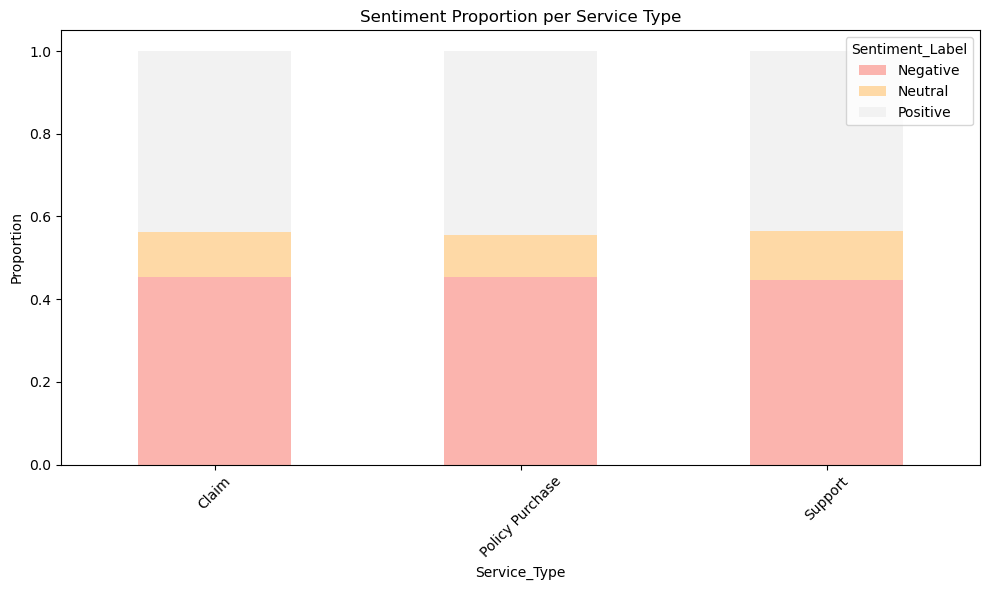

In [36]:
sentiment_prop = df.groupby(['Service_Type', 'Sentiment_Label']).size().unstack().fillna(0)
sentiment_prop = sentiment_prop.div(sentiment_prop.sum(axis=1), axis=0)

sentiment_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Sentiment Proportion per Service Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


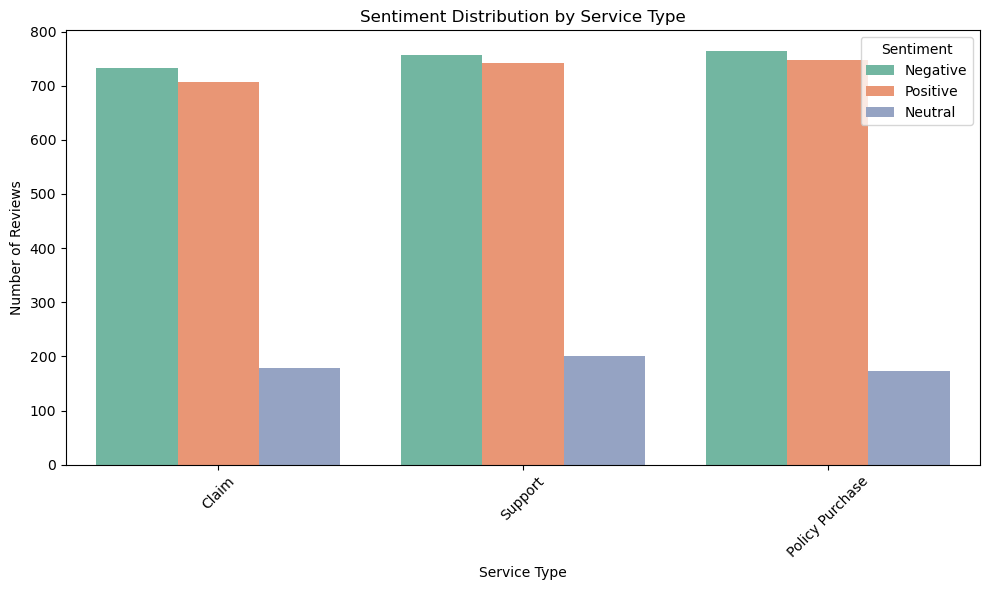

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Service_Type', hue='Sentiment_Label', palette='Set2')
plt.title('Sentiment Distribution by Service Type')
plt.xticks(rotation=45)
plt.xlabel('Service Type')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\1359641004.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Service_Type', y='Rating', ci=None, palette='coolwarm')
C:\Users\Ramu M\AppData\Local\Temp\ipykernel_24608\1359641004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Service_Type', y='Rating', ci=None, palette='coolwarm')


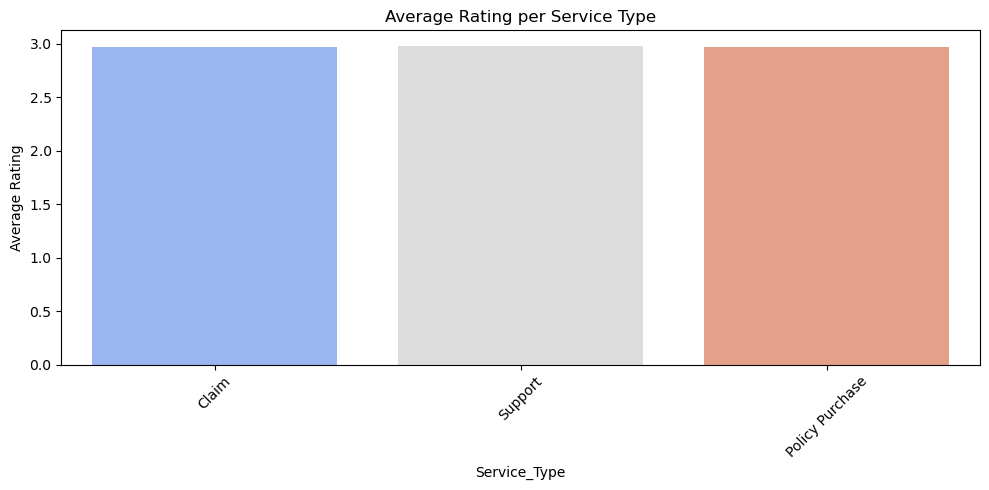

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Service_Type', y='Rating', ci=None, palette='coolwarm')
plt.title('Average Rating per Service Type')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


In [21]:
df.head()

,Review_ID,Customer_ID,Sentiment_Label,Rating,Service_Type,Clean_Review
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,Negative,1,Claim,website slow unresponsive tried purchase polic...
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Negative,1,Support,extremely dissatisfied level service provided ...
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,Positive,5,Claim,one best experience ive service provider polic...
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,Positive,4,Policy Purchase,service neither great bad got policy time webs...
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,Negative,1,Support,terrible experience claim department kept aski...


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode 'Sentiment_Label' (Target)
label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment_Label'])  # Positive=1, Negative=0

# Encode 'Service_Type' (Feature)
df['Service_Type'] = label_encoder.fit_transform(df['Service_Type'])

df['Clean_Review'] = label_encoder.fit_transform(df['Clean_Review'])

df['Review_ID'] = label_encoder.fit_transform(df['Review_ID'])

df['Customer_ID'] = label_encoder.fit_transform(df['Customer_ID'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Review_ID        5000 non-null   int32
 1   Customer_ID      5000 non-null   int32
 2   Sentiment_Label  5000 non-null   int32
 3   Rating           5000 non-null   int64
 4   Service_Type     5000 non-null   int32
 5   Clean_Review     5000 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 136.8 KB


In [24]:
df['Clean_Review'] = df['Clean_Review'].astype(str)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['Clean_Review'])


In [26]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize text
tokenized_reviews = [review.split() for review in df['Clean_Review']]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Average Word2Vec vectors
def get_w2v_vector(tokens):
    vec = np.zeros(100)
    count = 0
    for word in tokens:
        if word in w2v_model.wv:
            vec += w2v_model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

X_w2v = np.array([get_w2v_vector(tokens) for tokens in tokenized_reviews])


In [28]:
!pip install -U sentence-transformers


In [29]:
!pip install tensorflow==2.11.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [30]:
!pip uninstall keras keras-nightly keras-preprocessing keras-vis keras-applications tf-kera3g21s -y
!pip install keras==2.11.0 tensorflow==2.11.0 --no-cache-dir
!pip install -U transformers sentence-transformers --no-cache-dir


Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [31]:
!pip install keras
!pip install tf-keras


  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)


In [32]:
from sentence_transformers import SentenceTransformer

# Load BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the text into embeddings
X_bert = bert_model.encode(df['Clean_Review'], show_progress_bar=True)


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Sentiment_Label'])  # 0 = Negative, 1 = Neutral, 2 = Positive


In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and you want to drop columns for features
X = df.drop(['Sentiment_Label'], axis=1)
y = df['Sentiment_Label']


In [35]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)


# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       436

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



<Axes: >

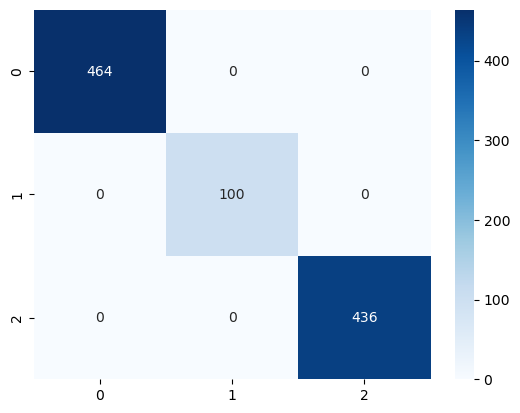

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


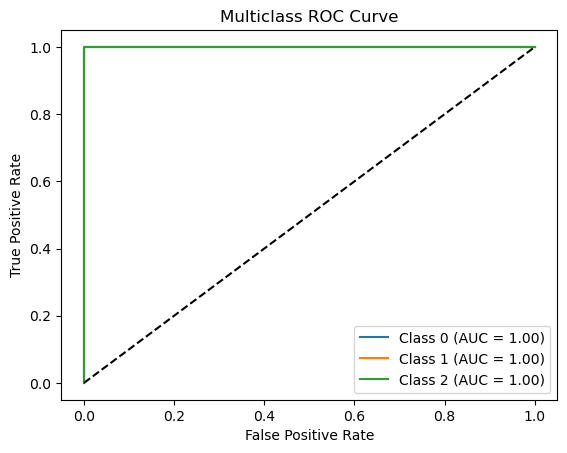

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Assume you have 3 classes (adjust as needed)
n_classes = len(np.unique(y_test))

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your actual class labels
y_score = model.predict_proba(X_test)  # This should return shape (n_samples, n_classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()


In [40]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 100.0%


In [41]:
df.iloc[0]

Review_ID          324
Customer_ID        898
Sentiment_Label      0
Rating               1
Service_Type         0
Clean_Review        14
Name: 0, dtype: object

In [42]:
X_train.columns

Index(['Review_ID', 'Customer_ID', 'Rating', 'Service_Type', 'Clean_Review'], dtype='object')

In [43]:
import numpy as np
import pandas as pd

# Your original feature names
feature_names = X.columns.tolist()  # Ensure this matches your training features

# Sample input
input_data = pd.DataFrame([[ 324, 898, 1, 0, 14,
    
]], columns=feature_names)

# Direct prediction (no scaling required)
prediction = model.predict(input_data)

# Interpret prediction
if prediction[0] == 0:
    print("✅ The model predicts: **Negative Sentiment**")
elif prediction[0] == 2:
    print("⚠️ The model predicts: **Neutral Sentiment**")
else:
    print("🚀 The model predicts: **Positive Sentiment**")

✅ The model predicts: **Negative Sentiment**


In [45]:
# When training
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X)
# Save both
import pickle
pickle.dump((vectorizer, model), open("sentiment_model.pkl", "wb"))



In [46]:
import pickle

pickle.dump(model, open("customerfeedback_model.pkl", 'wb'))

In [47]:
# loading the saved model
loaded_model = pickle.load(open('customerfeedback_model.pkl', 'rb'))

In [48]:
for column in X.columns:
  print(column)

Review_ID
Customer_ID
Rating
Service_Type
Clean_Review


In [22]:
df.iloc[2]

Review_ID          1668
Customer_ID        2952
Sentiment_Label       2
Rating                5
Service_Type          0
Clean_Review          8
Name: 2, dtype: int64

In [27]:
df.head(10)

,Review_ID,Customer_ID,Sentiment_Label,Rating,Service_Type,Clean_Review
0,324,898,0,1,0,14
1,2748,4666,0,1,2,6
2,1668,2952,2,5,0,8
3,927,4853,2,4,1,12
4,2333,2905,0,1,2,13
5,1203,2578,0,1,2,14
6,54,3479,0,1,2,7
7,261,4322,0,2,2,6
8,4182,1550,0,2,1,13
9,1744,4750,1,3,0,9
